### Generate some statistics files

In [1]:
! pip install libsumo addict

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import analysis.stats_utils_v2 as stats_utils
from analysis.viz_utils_v2 import visualizer
import os
from tqdm import tqdm

# change here
exp_repo = "/scratch/henryliu_root/henryliu98/shared_data/safetest-nade"
mode="ITE_calibration_change_2roundabout_out_priority_change_map"
user = "haoyang"
experiment_record_repo = f"{exp_repo}/{mode}/raw_data"
export_stat_dir = f"{exp_repo}/{mode}/{user}/processed_data"

# # test code
# experiment_record_repo = "output/test/raw_data"
# export_stat_dir = "output/test/processed_data"
# export_stat_dir = "."

if not os.path.exists(export_stat_dir):
    os.system(f"mkdir -p {export_stat_dir}")
    os.system(f"chmod 755 {export_stat_dir}")

In [3]:
stats_utils.export_to_csv(experiment_record_repo, export_stat_dir)
os.system(f"chmod -R 775 {export_stat_dir}")

100%|██████████| 91305/91305 [06:34<00:00, 231.57it/s]

info_error:  0


0

In [4]:
awk_cmd = """awk -F "[_/]" '{print $35}'""" + " check.txt | sort | uniq -cd"
print("count", "exp_id")
os.system(awk_cmd)

count exp_id


0

### Analyze

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

#### Import statistics of each experiment

In [6]:
exp_stats_info = pd.read_csv(f"{export_stat_dir}/stats.tsv", sep='\t')
exp_stats_info.head()

,name,end_time,crash_veh_1,crash_veh_2,importance,maneuver_challenge,neg_veh,neg_time_diff,neg_reason,neg_info,route_length,bv_22_route_length,lane_id,collision_type,location_type,relative_heading,distance
0,ITE_calibration_change_2roundabout_out_priorit...,1200.0,NaN,NaN,5.800881,1216,NaN,-1.0,NaN,NaN,70151.858813,6321.358391,NaN,NaN,NaN,None,-10.0
1,ITE_calibration_change_2roundabout_out_priorit...,1200.0,NaN,NaN,-0.093293,1140,NaN,-1.0,NaN,NaN,62875.229636,2615.580231,NaN,NaN,NaN,None,-10.0
2,ITE_calibration_change_2roundabout_out_priorit...,1200.0,NaN,NaN,-0.215063,1841,NaN,-1.0,NaN,NaN,68358.705988,1352.523919,NaN,NaN,NaN,None,-10.0
3,ITE_calibration_change_2roundabout_out_priorit...,1200.0,NaN,NaN,-0.139291,1079,NaN,-1.0,NaN,NaN,65264.695269,3166.389300,NaN,NaN,NaN,None,-10.0
4,ITE_calibration_change_2roundabout_out_priorit...,1200.0,NaN,NaN,-0.139080,935,NaN,-1.0,NaN,NaN,61733.181731,4165.565181,NaN,NaN,NaN,None,-10.0


In [7]:
# exp_stats_info_old = pd.read_csv(f"{export_stat_dir}/stats-old.tsv", sep='\t')
# b = exp_stats_info_old[~exp_stats_info_old["neg_reason"].isna()]

# cnt = 0
# for name in a["name"]:
#     location = a[a["name"] == name]["location_type"].values[0]
#     collision_a = a[a["name"] == name]["collision_type"].values[0]
#     collision_b = b[b["name"] == name]["collision_type"].values[0]
#     if collision_a != collision_b and location == "intersection":
#         print(name, collision_a, collision_b)
#         cnt += 1
    
# print(cnt)

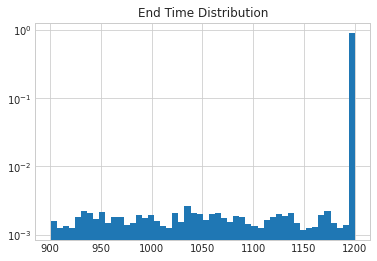

In [8]:
# draw the end time distribution
# exp_stats_info["end_time"].hist(bins=100)
num_experiments = len(exp_stats_info)
plt.hist(exp_stats_info["end_time"], weights=np.ones(num_experiments)/num_experiments, bins=50)
plt.yscale("log")
plt.title("End Time Distribution")
plt.savefig(f"{export_stat_dir}/end_time.png")

**Filter the experiments with time difference between negligence and collision larger than 3s**

In [9]:
warm_up_time = 900
estimated_end_time = warm_up_time + 300

has_collision = (exp_stats_info['end_time'] < estimated_end_time) & (exp_stats_info['end_time'] >= warm_up_time)
collision_df = exp_stats_info[has_collision]

has_collision_in_warmup = (exp_stats_info['end_time'] <= warm_up_time)
warmup_collision_df = exp_stats_info[has_collision_in_warmup]

print("Collision numbers:", len(collision_df), "Warmup collisions:", len(warmup_collision_df)) # the number of collisions 

Collision numbers: 7733 Warmup collisions: 0


**See the list of files with time difference between negligence and collision larger than 3s**

### See the collisions

In [10]:
collision_df.head()

,name,end_time,crash_veh_1,crash_veh_2,importance,maneuver_challenge,neg_veh,neg_time_diff,neg_reason,neg_info,route_length,bv_22_route_length,lane_id,collision_type,location_type,relative_heading,distance
8,ITE_calibration_change_2roundabout_out_priorit...,1121.1,BV_9.21,BV_9.23,2.540332,507,BV_9.21,0.5,LeftFoll,intersection_cutin,39135.508691,1344.645763,EG_16_23_1_1,sideswipe,intersection,17.214534672079253,-0.542635
10,ITE_calibration_change_2roundabout_out_priorit...,1160.9,BV_8.52,BV_21.66,3.238729,810,BV_8.52,0.6,LeftFoll,highway_cutin,51768.036564,1497.000318,EG_1_3_1_1,sideswipe,freeway_1,18.055732989240596,-0.875279
65,ITE_calibration_change_2roundabout_out_priorit...,1024.0,BV_20.31,BV_18.7,5.586312,296,BV_18.7,2.5,TFL,intersection_tfl,22413.302229,1604.326284,:NODE_24_5_0,angle,intersection,126.38752519425026,-1.000000
92,ITE_calibration_change_2roundabout_out_priorit...,1068.6,BV_1.10,BV_16.18,3.221256,873,BV_16.18,2.0,Lead,intersection_rearend,37975.394335,2084.108296,EG_9_1_23_0,rear_end,intersection,2.050404405524489,-0.109969
111,ITE_calibration_change_2roundabout_out_priorit...,992.9,BV_14.8,BV_22.8,2.604904,281,BV_14.8,0.6,RightFoll,intersection_cutin,19233.393070,769.219947,EG_16_23_1_0,angle,intersection,20.615894176483238,-1.931798


In [11]:
all_maneuvers = exp_stats_info["maneuver_challenge"].sum()
all_time = (exp_stats_info["end_time"] - 900).sum()
all_routes = exp_stats_info["route_length"].sum()
mile_to_m = 1609.344
no_negligence_collision_related = collision_df['neg_time_diff'] < 0
power_importance_weight = np.power(10, - exp_stats_info['importance'])
collide_importance_weight = power_importance_weight[(power_importance_weight < 1) & has_collision]
importance_all = collide_importance_weight.sum()
num_experiments = len(exp_stats_info)
num_collisions = len(collision_df)
no_related_negligence_collision = collision_df[no_negligence_collision_related]

print(f"Number of experiments: {num_experiments}")
print(f"Number of collision: {num_collisions}")
print(f"Collisions with weight less than 1: {len(collide_importance_weight)}")
print(f"Importance summation: {importance_all}")
print(f"Max weight: {collide_importance_weight.max()}, Min weight: {collide_importance_weight.min()}")
print(f"raw collision rate: {num_collisions / num_experiments}")
print(f"adjusted collision rate (importance): {importance_all/num_experiments}")
print(f"Collision due to traffic light ignorance: {len(collision_df[collision_df['neg_reason'] == 'TFL'])}")
print(f"Overall maneuvers: {all_maneuvers}")

print(f"Collision without negligence: {len(no_related_negligence_collision)}")
print(f"Maximum time between collision and negligence: {collision_df['neg_time_diff'].max():.2f} s")

print()
print(f"Overall time: {all_time:.2f} s")
print(f"Maneuvers per second: {all_maneuvers / all_time}")
print(f"Overall route length: {all_routes:.2f} m")
print(f"m/s: {all_routes/all_time}")
print(f"Overall route length: {all_routes/mile_to_m} mile")
print(f"mile/s: {all_routes/mile_to_m/all_time} mile/s")
print(f"Crash per mile: {importance_all/all_routes*mile_to_m} crash/mile")

Number of experiments: 91305
Number of collision: 7733
Collisions with weight less than 1: 7595
Importance summation: 9.26856171513461
Max weight: 0.03392751217563374, Min weight: 9.915005157922397e-14
raw collision rate: 0.084694156946498
adjusted collision rate (importance): 0.00010151209369842406
Collision due to traffic light ignorance: 490
Overall maneuvers: 78072363
Collision without negligence: 148
Maximum time between collision and negligence: 4.90 s

Overall time: 26223951.40 s
Maneuvers per second: 2.9771395549489914
Overall route length: 5286074561.98 m
m/s: 201.57429676982807
Overall route length: 3284614.4528336697 mile
mile/s: 0.12525246110827024 mile/s
Crash per mile: 2.82181115873083e-06 crash/mile


In [12]:
exp_stats_info.head()

,name,end_time,crash_veh_1,crash_veh_2,importance,maneuver_challenge,neg_veh,neg_time_diff,neg_reason,neg_info,route_length,bv_22_route_length,lane_id,collision_type,location_type,relative_heading,distance
0,ITE_calibration_change_2roundabout_out_priorit...,1200.0,NaN,NaN,5.800881,1216,NaN,-1.0,NaN,NaN,70151.858813,6321.358391,NaN,NaN,NaN,None,-10.0
1,ITE_calibration_change_2roundabout_out_priorit...,1200.0,NaN,NaN,-0.093293,1140,NaN,-1.0,NaN,NaN,62875.229636,2615.580231,NaN,NaN,NaN,None,-10.0
2,ITE_calibration_change_2roundabout_out_priorit...,1200.0,NaN,NaN,-0.215063,1841,NaN,-1.0,NaN,NaN,68358.705988,1352.523919,NaN,NaN,NaN,None,-10.0
3,ITE_calibration_change_2roundabout_out_priorit...,1200.0,NaN,NaN,-0.139291,1079,NaN,-1.0,NaN,NaN,65264.695269,3166.389300,NaN,NaN,NaN,None,-10.0
4,ITE_calibration_change_2roundabout_out_priorit...,1200.0,NaN,NaN,-0.139080,935,NaN,-1.0,NaN,NaN,61733.181731,4165.565181,NaN,NaN,NaN,None,-10.0


In [13]:
a = exp_stats_info[(exp_stats_info["importance"] <= 0) & (exp_stats_info["end_time"] < 1200)]
a

,name,end_time,crash_veh_1,crash_veh_2,importance,maneuver_challenge,neg_veh,neg_time_diff,neg_reason,neg_info,route_length,bv_22_route_length,lane_id,collision_type,location_type,relative_heading,distance
234,ITE_calibration_change_2roundabout_out_priorit...,1090.1,BV_21.43,BV_14.8,-0.082894,763,BV_14.8,-1.0,NaN,NaN,40139.826621,5229.672050,:nd_34_1_6_1_0,sideswipe,roundabout_1,18.463832810656015,3.280000
825,ITE_calibration_change_2roundabout_out_priorit...,1167.4,BV_21.53,BV_22.12,-0.193576,1115,BV_22.12,-1.0,NaN,NaN,59665.389584,2964.808719,:nd_34_1_6_1_0,sideswipe,roundabout_1,18.958655498936025,3.280000
1090,ITE_calibration_change_2roundabout_out_priorit...,911.8,BV_2.24,BV_2.25,-0.002776,51,BV_2.25,-1.0,NaN,NaN,2198.175427,59.482114,EG_18_12_171_1,angle,intersection,60.28622331017277,-0.242563
1301,ITE_calibration_change_2roundabout_out_priorit...,1016.3,BV_21.50,BV_8.60,-0.054730,391,BV_8.60,-1.0,NaN,NaN,23566.404833,402.990293,:nd_34_1_6_1_0,sideswipe,roundabout_1,11.54034268832487,3.280000
1357,ITE_calibration_change_2roundabout_out_priorit...,920.8,BV_21.32,BV_22.17,-0.007462,105,BV_22.17,-1.0,NaN,NaN,4435.566002,340.048949,:nd_34_1_6_1_0,sideswipe,roundabout_1,14.911413917777622,3.280000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89135,ITE_calibration_change_2roundabout_out_priorit...,994.7,BV_8.37,BV_21.50,-0.042036,433,BV_21.50,-1.0,NaN,NaN,17388.005399,1700.415097,:nd_34_1_6_0_0,rear_end,roundabout_1,29.422002265669903,-1.000000
89714,ITE_calibration_change_2roundabout_out_priorit...,1047.3,BV_8.38,BV_17.60,-0.059024,707,BV_17.60,-1.0,NaN,NaN,29868.824406,1552.508735,:nd_34_1_6_0_0,angle,roundabout_1,20.0077478953786,-1.000000
90199,ITE_calibration_change_2roundabout_out_priorit...,949.6,BV_8.45,BV_17.53,-0.026803,237,BV_17.53,-1.0,NaN,NaN,10827.769738,379.042748,:nd_34_1_6_0_0,rear_end,roundabout_1,28.060908277633644,3.280000
90697,ITE_calibration_change_2roundabout_out_priorit...,1085.0,BV_17.43,BV_8.66,-0.026974,349,BV_8.66,-1.0,NaN,NaN,36559.401639,2240.015358,:nd_34_1_6_1_0,sideswipe,roundabout_1,13.525725049857783,3.280000


#### BV_22 Collision

In [14]:
is_veh_1_bv_22 = np.array(list(map(lambda x: x.startswith("BV_22"), collision_df["crash_veh_1"])))
is_veh_2_bv_22 = np.array(list(map(lambda x: x.startswith("BV_22"), collision_df["crash_veh_2"])))
has_bv_22 = is_veh_1_bv_22 | is_veh_2_bv_22
bv_22_collision_df = collision_df[has_bv_22]

total_bv_22_distance = exp_stats_info["bv_22_route_length"].sum()

num_bv_22_expr = np.sum(has_bv_22)
bv_22_collision_is_large_1 = bv_22_collision_df["importance"] < 0
power_bv_22_weight = np.power(10, -bv_22_collision_df["importance"])[~bv_22_collision_is_large_1]
bv_22_importance = np.sum(power_bv_22_weight)

print("Number of bv_22 collision:", num_bv_22_expr)
print("Total bv_22 distance:", total_bv_22_distance)
print("Number of bv_22 collision importance > 1:", np.sum(bv_22_collision_is_large_1))
print("Raw collision rate:", num_bv_22_expr / num_experiments)
print("Collision rate:", bv_22_importance / num_experiments)
print("Collision rate (weighted):", bv_22_importance / total_bv_22_distance * mile_to_m)

Number of bv_22 collision: 699
Total bv_22 distance: 290198587.1824629
Number of bv_22 collision importance > 1: 15
Raw collision rate: 0.007655659602431412
Collision rate: 1.134595698506931e-05
Collision rate (weighted): 5.744990104533215e-06


### Crash Distribution (with negligence)

In [15]:
exp_stats_info[(exp_stats_info["importance"] <= 0) & (exp_stats_info["end_time"] < 1200) & (exp_stats_info["neg_time_diff"]  > 0)]

,name,end_time,crash_veh_1,crash_veh_2,importance,maneuver_challenge,neg_veh,neg_time_diff,neg_reason,neg_info,route_length,bv_22_route_length,lane_id,collision_type,location_type,relative_heading,distance


### Load file that show the relationship between lane and experiment

**See the collision number in each experiment**

In [16]:
exp_stats_info.head()

,name,end_time,crash_veh_1,crash_veh_2,importance,maneuver_challenge,neg_veh,neg_time_diff,neg_reason,neg_info,route_length,bv_22_route_length,lane_id,collision_type,location_type,relative_heading,distance
0,ITE_calibration_change_2roundabout_out_priorit...,1200.0,NaN,NaN,5.800881,1216,NaN,-1.0,NaN,NaN,70151.858813,6321.358391,NaN,NaN,NaN,None,-10.0
1,ITE_calibration_change_2roundabout_out_priorit...,1200.0,NaN,NaN,-0.093293,1140,NaN,-1.0,NaN,NaN,62875.229636,2615.580231,NaN,NaN,NaN,None,-10.0
2,ITE_calibration_change_2roundabout_out_priorit...,1200.0,NaN,NaN,-0.215063,1841,NaN,-1.0,NaN,NaN,68358.705988,1352.523919,NaN,NaN,NaN,None,-10.0
3,ITE_calibration_change_2roundabout_out_priorit...,1200.0,NaN,NaN,-0.139291,1079,NaN,-1.0,NaN,NaN,65264.695269,3166.389300,NaN,NaN,NaN,None,-10.0
4,ITE_calibration_change_2roundabout_out_priorit...,1200.0,NaN,NaN,-0.139080,935,NaN,-1.0,NaN,NaN,61733.181731,4165.565181,NaN,NaN,NaN,None,-10.0


In [17]:
# collision: negligence-caused 和 no negligence caused (SUMO)
# 每个种类做collision node的分布
neg_caused_collision = exp_stats_info[exp_stats_info["neg_time_diff"] >= 0 & has_collision] # weight < 1 collisions
no_neg_realated_collision = exp_stats_info[(exp_stats_info["neg_time_diff"] < 0) & has_collision]
print(len(neg_caused_collision), len(no_neg_realated_collision))

7589 148


Negligence caused distribution

In [18]:
neg_caused_collision["lane_id"].value_counts()

EG_25_2_1_0       817
EG_1_3_1_1        690
EG_1_3_1_0        522
EG_17_1_1_0       434
EG_13_1_1_0       340
                 ... 
EG_21_1_1_0         1
EG_12_1_1_0         1
:NODE_19_2_0        1
:NODE_16_1_0        1
:nd_12_2_1_0_0      1
Name: lane_id, Length: 129, dtype: int64

No negligence caused distribution

In [19]:
print(no_neg_realated_collision["lane_id"].value_counts())
print(len(no_neg_realated_collision))

:nd_34_1_6_0_0    67
:nd_34_1_6_1_0    51
EG_18_12_171_1    20
:NODE_6_2_0        3
EG_18_12_171_0     3
:nd_34_1_6_0_1     2
EG_34_1_16_0       1
EG_16_45_1_1       1
Name: lane_id, dtype: int64
148


### Crash Distribution (with negligence)

In [20]:
neg_caused_collision.head()

,name,end_time,crash_veh_1,crash_veh_2,importance,maneuver_challenge,neg_veh,neg_time_diff,neg_reason,neg_info,route_length,bv_22_route_length,lane_id,collision_type,location_type,relative_heading,distance
8,ITE_calibration_change_2roundabout_out_priorit...,1121.1,BV_9.21,BV_9.23,2.540332,507,BV_9.21,0.5,LeftFoll,intersection_cutin,39135.508691,1344.645763,EG_16_23_1_1,sideswipe,intersection,17.214534672079253,-0.542635
10,ITE_calibration_change_2roundabout_out_priorit...,1160.9,BV_8.52,BV_21.66,3.238729,810,BV_8.52,0.6,LeftFoll,highway_cutin,51768.036564,1497.000318,EG_1_3_1_1,sideswipe,freeway_1,18.055732989240596,-0.875279
65,ITE_calibration_change_2roundabout_out_priorit...,1024.0,BV_20.31,BV_18.7,5.586312,296,BV_18.7,2.5,TFL,intersection_tfl,22413.302229,1604.326284,:NODE_24_5_0,angle,intersection,126.38752519425026,-1.000000
92,ITE_calibration_change_2roundabout_out_priorit...,1068.6,BV_1.10,BV_16.18,3.221256,873,BV_16.18,2.0,Lead,intersection_rearend,37975.394335,2084.108296,EG_9_1_23_0,rear_end,intersection,2.050404405524489,-0.109969
111,ITE_calibration_change_2roundabout_out_priorit...,992.9,BV_14.8,BV_22.8,2.604904,281,BV_14.8,0.6,RightFoll,intersection_cutin,19233.393070,769.219947,EG_16_23_1_0,angle,intersection,20.615894176483238,-1.931798


In [21]:
def crash_distribution(neg_caused_collision, feat_name):
    crash_type_dist = neg_caused_collision.groupby(["location", feat_name], as_index=False).agg(
        {
            "name": "count",
            "exp_importance": "sum"
        }
    )

    crash_type_dist["collision_rate"] = crash_type_dist["name"] / num_experiments
    crash_type_dist["importance_rate"] = crash_type_dist["exp_importance"] / num_experiments

    crash_type_dist.rename(columns={"name": "count"}, inplace=True)
    return crash_type_dist

In [22]:
neg_caused_collision = neg_caused_collision.copy()
neg_caused_collision["exp_importance"] = np.power(10, -neg_caused_collision["importance"])

# ! should be commmented later
neg_caused_collision["exp_importance"][neg_caused_collision["exp_importance"] >= 1] = 0

get_type_func = lambda x: x.split("_")[0] if x is not np.nan else "None"
neg_caused_collision["location"] = list(map(get_type_func, neg_caused_collision["location_type"]))
neg_caused_collision["collision"] = list(map(get_type_func, neg_caused_collision["collision_type"]))


crash_type_dist = crash_distribution(neg_caused_collision, "collision")
crash_type_dist

/tmp/ipykernel_1169051/1315232982.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_caused_collision["exp_importance"][neg_caused_collision["exp_importance"] >= 1] = 0


,location,collision,count,exp_importance,collision_rate,importance_rate
0,freeway,angle,61,0.032089,0.000668,3.514468e-07
1,freeway,rear,91,1.378309,0.000997,1.509566e-05
2,freeway,sideswipe,1372,0.717317,0.015027,7.856269e-06
3,intersection,angle,926,3.014266,0.010142,3.301315e-05
4,intersection,head,89,0.187410,0.000975,2.052576e-06
5,intersection,rear,3729,2.324783,0.040841,2.546173e-05
6,intersection,sideswipe,445,1.123431,0.004874,1.230415e-05
7,roundabout,angle,548,0.292166,0.006002,3.199888e-06
8,roundabout,rear,137,0.072657,0.001500,7.957580e-07
9,roundabout,sideswipe,191,0.101947,0.002092,1.116555e-06


location
freeway         0.229563
intersection    0.717467
roundabout      0.050361
Name: exp_importance, dtype: float64


Text(0.5, 1.0, 'ground truth')

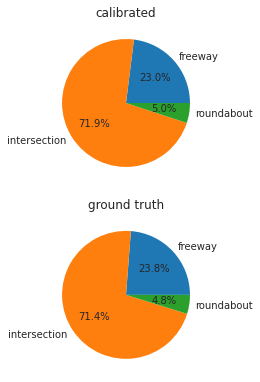

In [23]:
location_distribution = neg_caused_collision.groupby("location").sum()/importance_all
proportion = location_distribution["exp_importance"]
print(proportion)

plt.figure(figsize=(20, 10))
plt.subplot(3, 1, 1)
plt.pie(proportion, labels=proportion.index, autopct='%1.1f%%')
# plt.bar(proportion.index, values=proportion)
plt.title("calibrated")
plt.subplot(3, 1, 2)
true_dist = np.array([1525, 4581, 307]) / (1525 + 4581 + 307)
plt.pie(true_dist, labels=proportion.index, autopct='%1.1f%%')
# plt.bar(proportion.index, values=true_dist)
plt.title("ground truth")

In [24]:
def pie_chart_plot(df, mode, feat_name):
    mark = df["location"] == mode
    labels = df[mark][feat_name]
    values = df[mark]["importance_rate"]
    plt.pie(values, labels=labels, autopct='%1.1f%%')
    # plt.bar(labels, values)
    plt.title(f'{mode}')
    # plt.legend(labels)

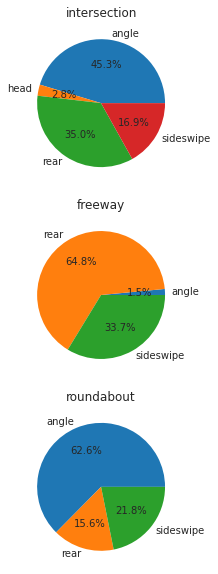

In [25]:
plt.figure(figsize=(30, 10))
plt.subplot(3, 1, 1)
pie_chart_plot(crash_type_dist, "intersection", "collision")
plt.subplot(3, 1, 2)
pie_chart_plot(crash_type_dist, "freeway", "collision")
plt.subplot(3, 1, 3)
pie_chart_plot(crash_type_dist, "roundabout", "collision")
plt.savefig(f"{export_stat_dir}/pie_chart.png")

In [26]:
len(neg_caused_collision)

7589

#### Negligence reason

In [27]:
neg_reason_crash_dist = crash_distribution(neg_caused_collision, "neg_reason")
neg_reason_crash_dist

,location,neg_reason,count,exp_importance,collision_rate,importance_rate
0,freeway,Lead,93,1.376935,0.001019,1.508061e-05
1,freeway,LeftFoll,754,0.396416,0.008258,4.341663e-06
2,freeway,RightFoll,677,0.354364,0.007415,3.881104e-06
3,intersection,Lead,3718,1.944101,0.040721,2.129238e-05
4,intersection,LeftFoll,564,1.417031,0.006177,1.551976e-05
5,intersection,RightFoll,417,1.049022,0.004567,1.148921e-05
6,intersection,TFL,490,2.239736,0.005367,2.453026e-05
7,roundabout,Lead,191,0.102492,0.002092,1.122528e-06
8,roundabout,LeftFoll,287,0.154068,0.003143,1.687404e-06
9,roundabout,RightFoll,397,0.209693,0.004348,2.296621e-06


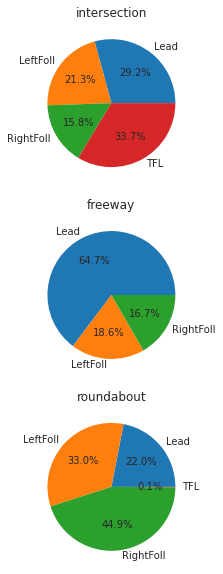

In [28]:
plt.figure(figsize=(30, 10))
plt.subplot(3, 1, 1)
pie_chart_plot(neg_reason_crash_dist, "intersection", "neg_reason")
plt.subplot(3, 1, 2)
pie_chart_plot(neg_reason_crash_dist, "freeway", "neg_reason")
plt.subplot(3, 1, 3)
pie_chart_plot(neg_reason_crash_dist, "roundabout", "neg_reason")
plt.savefig(f"{export_stat_dir}/neg_reason_pie_chart.png")

#### BV 22 Negligence Caused

In [29]:
is_veh_1_bv_22 = np.array(list(map(lambda x: x.startswith("BV_22"), neg_caused_collision["crash_veh_1"])))
is_veh_2_bv_22 = np.array(list(map(lambda x: x.startswith("BV_22"), neg_caused_collision["crash_veh_2"])))
has_bv_22 = is_veh_1_bv_22 | is_veh_2_bv_22
bv_22_neg_caused_collision = neg_caused_collision[has_bv_22]



bv_22_crash_type_dist = crash_distribution(bv_22_neg_caused_collision, "collision")
bv_22_crash_type_dist

,location,collision,count,exp_importance,collision_rate,importance_rate
0,freeway,angle,2,0.001171,0.000022,1.282494e-08
1,freeway,rear,20,0.295308,0.000219,3.234304e-06
2,freeway,sideswipe,108,0.056190,0.001183,6.154045e-07
3,intersection,angle,102,0.296553,0.001117,3.247943e-06
4,intersection,head,2,0.005248,0.000022,5.747243e-08
5,intersection,rear,277,0.155230,0.003034,1.700128e-06
6,intersection,sideswipe,60,0.164661,0.000657,1.803422e-06
7,roundabout,angle,70,0.038965,0.000767,4.267558e-07
8,roundabout,rear,30,0.016182,0.000329,1.772277e-07
9,roundabout,sideswipe,13,0.006435,0.000142,7.047520e-08


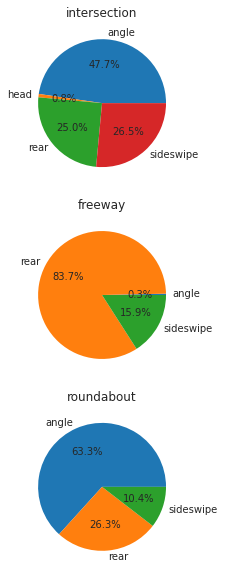

In [30]:
plt.figure(figsize=(30, 10))
plt.subplot(3, 1, 1)
pie_chart_plot(bv_22_crash_type_dist, "intersection", "collision")
plt.subplot(3, 1, 2)
pie_chart_plot(bv_22_crash_type_dist, "freeway", "collision")
plt.subplot(3, 1, 3)
pie_chart_plot(bv_22_crash_type_dist, "roundabout", "collision")
plt.savefig(f"{export_stat_dir}/bv_22_pie_chart.png")

##### EG happened collision intersection&angle

In [31]:
eg_collision = list(neg_caused_collision["lane_id"])
eg_collision_angle_df = neg_caused_collision[((neg_caused_collision["collision"] == "angle") | (neg_caused_collision["collision"] == "sideswipe")) & (neg_caused_collision["location"] == "freeway")]
# print(neg_caused_collision["relative_heading"])
# print(len(neg_caused_collision["relative_heading"]))

heading_float_list = [float(heading) for heading in eg_collision_angle_df["relative_heading"] if heading != 'None']
heading_float_list = np.array(heading_float_list)
print(len(heading_float_list))

1433


In [32]:
eg_collision_angle_df = eg_collision_angle_df.sort_values(by="relative_heading")
eg_collision_angle_df["exp_cum"] = eg_collision_angle_df["exp_importance"].cumsum() / eg_collision_angle_df["exp_importance"].sum()
eg_collision_angle_df[eg_collision_angle_df["exp_cum"] < 28.08/(28.08+2.52)]

,name,end_time,crash_veh_1,crash_veh_2,importance,maneuver_challenge,neg_veh,neg_time_diff,neg_reason,neg_info,...,bv_22_route_length,lane_id,collision_type,location_type,relative_heading,distance,exp_importance,location,collision,exp_cum
88115,ITE_calibration_change_2roundabout_out_priorit...,1136.0,BV_13.10,BV_17.51,6.492193,594,BV_13.10,0.6,LeftFoll,highway_cutin,...,3881.034335,EG_1_1_1_1,sideswipe,freeway_2,16.135289189471592,-2.544166,3.219641e-07,freeway,sideswipe,4.296260e-07
23275,ITE_calibration_change_2roundabout_out_priorit...,926.7,BV_17.60,BV_22.8,3.300630,9,BV_17.60,0.6,RightFoll,highway_cutin,...,628.571700,EG_1_3_1_0,sideswipe,freeway_1,16.145704115055352,-0.270700,5.004610e-04,freeway,sideswipe,6.682404e-04
36320,ITE_calibration_change_2roundabout_out_priorit...,908.1,BV_21.46,BV_17.32,3.298298,48,BV_21.46,0.6,RightFoll,highway_cutin,...,93.286171,EG_1_1_1_0,sideswipe,freeway_2,16.480359420048615,-0.259239,5.031555e-04,freeway,sideswipe,1.339647e-03
9077,ITE_calibration_change_2roundabout_out_priorit...,1028.0,BV_17.50,BV_17.49,3.263617,331,BV_17.50,0.6,LeftFoll,highway_cutin,...,10.712867,EG_1_1_1_1,sideswipe,freeway_2,16.575139682796276,-0.184510,5.449836e-04,freeway,sideswipe,2.066868e-03
46285,ITE_calibration_change_2roundabout_out_priorit...,1091.6,BV_21.47,BV_17.58,3.262272,362,BV_21.47,0.6,RightFoll,highway_cutin,...,355.643833,EG_1_1_1_0,sideswipe,freeway_2,16.634047372721028,-0.296825,5.466734e-04,freeway,sideswipe,2.796344e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75657,ITE_calibration_change_2roundabout_out_priorit...,1137.8,BV_21.66,BV_8.62,3.244608,298,BV_21.66,0.6,RightFoll,highway_cutin,...,4399.411924,EG_1_3_1_0,sideswipe,freeway_1,19.564467736066845,-1.149838,5.693666e-04,freeway,sideswipe,9.139939e-01
46332,ITE_calibration_change_2roundabout_out_priorit...,1096.0,BV_8.59,BV_17.48,3.220963,556,BV_8.59,0.6,LeftFoll,highway_cutin,...,2039.745735,EG_1_3_1_1,sideswipe,freeway_1,19.565143280360758,-0.067903,6.012249e-04,freeway,sideswipe,9.147962e-01
49737,ITE_calibration_change_2roundabout_out_priorit...,1186.9,BV_21.51,BV_17.62,3.173768,1013,BV_21.51,0.6,RightFoll,highway_cutin,...,3995.005576,EG_1_3_1_0,sideswipe,freeway_1,19.567674587024584,-0.897293,6.702419e-04,freeway,sideswipe,9.156906e-01
23341,ITE_calibration_change_2roundabout_out_priorit...,1192.7,BV_17.50,BV_8.66,3.181378,933,BV_17.50,0.6,RightFoll,highway_cutin,...,1415.379852,EG_1_3_1_0,sideswipe,freeway_1,19.569818674582834,-0.747072,6.586009e-04,freeway,sideswipe,9.165694e-01


0.04256803907885555


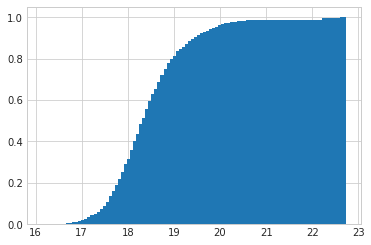

In [33]:
# # draw the histogram of the relative_heading of the collision in each location in neg_caused_collision
# grouped_neg_collision = neg_caused_collision["relative_heading"].groupby(neg_caused_collision["location"])
# for name, group_data in grouped_neg_collision:
#     plt.figure()
#     plt.hist(group_data, bins=50)
#     # plt.title(f"Collision Relative Heading Distribution in {name}")
# heading_flaot_list = np.clip(heading_flaot_list, 0, 30)
plt.figure()
plt.hist(heading_float_list, bins=100, density=True, cumulative=True)

print(np.sum(heading_float_list>20)/len(heading_float_list))

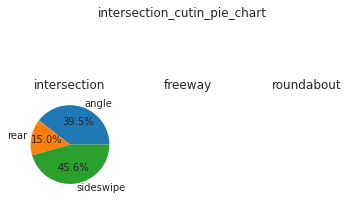

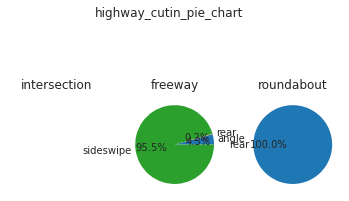

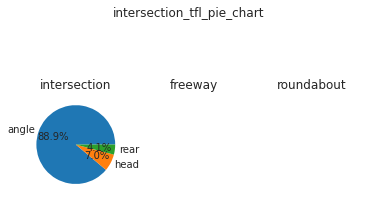

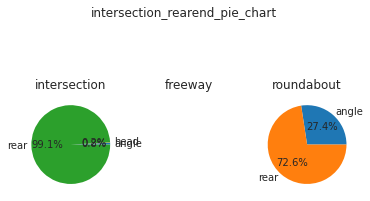

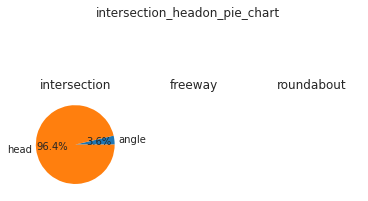

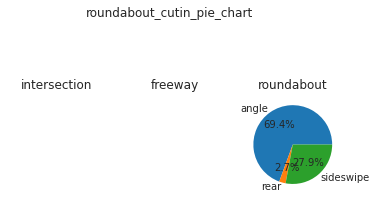

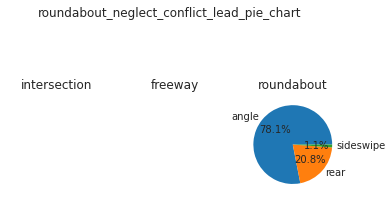

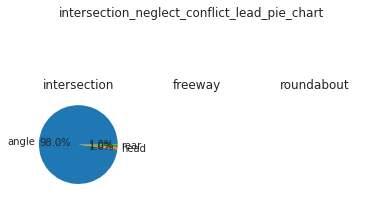

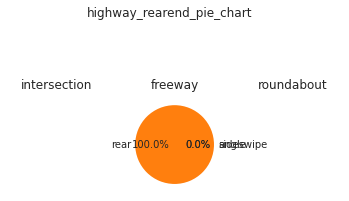

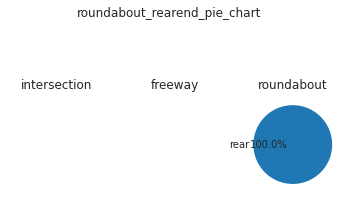

In [34]:
neg_uniq_infos = neg_caused_collision["neg_info"].unique()

neg_info_crash_dist = {}
for info in neg_uniq_infos:
    df = neg_caused_collision[neg_caused_collision["neg_info"] == info].copy()
    
    crash_type_dist = crash_distribution(df, "collision")
    neg_info_crash_dist[info] = crash_type_dist
    plt.figure()
    plt.subplot(1, 3, 1)
    pie_chart_plot(crash_type_dist, "intersection", "collision")
    plt.subplot(1, 3, 2)
    pie_chart_plot(crash_type_dist, "freeway", "collision")
    plt.subplot(1, 3, 3)
    pie_chart_plot(crash_type_dist, "roundabout", "collision")
    plt.suptitle(f"{info}_pie_chart")
    plt.savefig(f"{export_stat_dir}/{info}_pie_chart.png")

In [35]:
from IPython.display import display
for info, crash_dist in neg_info_crash_dist.items():
    print(info)
    display(crash_dist)

intersection_cutin


,location,collision,count,exp_importance,collision_rate,importance_rate
0,intersection,angle,384,0.973013,0.004206,0.000011
1,intersection,rear,152,0.369610,0.001665,0.000004
2,intersection,sideswipe,445,1.123431,0.004874,0.000012


highway_cutin


,location,collision,count,exp_importance,collision_rate,importance_rate
0,freeway,angle,60,0.032083,0.000657,3.513785e-07
1,freeway,rear,1,0.001395,0.000011,1.527896e-08
2,freeway,sideswipe,1370,0.717302,0.015005,7.856109e-06
3,roundabout,rear,1,0.000535,0.000011,5.856722e-09


intersection_tfl


,location,collision,count,exp_importance,collision_rate,importance_rate
0,intersection,angle,401,1.969898,0.004392,2.157492e-05
1,intersection,head,29,0.155375,0.000318,1.701715e-06
2,intersection,rear,17,0.091006,0.000186,9.967219e-07


intersection_rearend


,location,collision,count,exp_importance,collision_rate,importance_rate
0,intersection,angle,27,0.014233,0.000296,1.558864e-07
1,intersection,head,5,0.003107,0.000055,3.403139e-08
2,intersection,rear,3558,1.863596,0.038968,2.041067e-05
3,roundabout,angle,4,0.002143,0.000044,2.347156e-08
4,roundabout,rear,10,0.005674,0.000110,6.214797e-08


intersection_headon


,location,collision,count,exp_importance,collision_rate,importance_rate
0,intersection,angle,2,0.001071,0.000022,1.173482e-08
1,intersection,head,54,0.028373,0.000591,3.107528e-07


roundabout_cutin


,location,collision,count,exp_importance,collision_rate,importance_rate
0,roundabout,angle,475,0.252158,0.005202,2.761716e-06
1,roundabout,rear,18,0.009678,0.000197,1.059947e-07
2,roundabout,sideswipe,190,0.101390,0.002081,1.110458e-06


roundabout_neglect_conflict_lead


,location,collision,count,exp_importance,collision_rate,importance_rate
0,roundabout,angle,69,0.037864,0.000756,4.147006e-07
1,roundabout,rear,20,0.010076,0.000219,1.103607e-07
2,roundabout,sideswipe,1,0.000557,0.000011,6.096553e-09


intersection_neglect_conflict_lead


,location,collision,count,exp_importance,collision_rate,importance_rate
0,intersection,angle,112,0.056050,0.001227,6.138758e-07
1,intersection,head,1,0.000555,0.000011,6.077184e-09
2,intersection,rear,2,0.000572,0.000022,6.261819e-09


highway_rearend


,location,collision,count,exp_importance,collision_rate,importance_rate
0,freeway,angle,1,0.000006,0.000011,6.833810e-11
1,freeway,rear,90,1.376914,0.000986,1.508038e-05
2,freeway,sideswipe,2,0.000015,0.000022,1.598465e-10


roundabout_rearend


,location,collision,count,exp_importance,collision_rate,importance_rate
0,roundabout,rear,88,0.046693,0.000964,5.113979e-07


In [36]:
! pip install gurobipy
col_names = ["ia", "ih", "ir", "is", "ra", "rr", "rs", "fr", "fs", "fa"]

row_names = [
    "intersection_cutin", 
    "intersection_neglect_conflict_lead", 
    "intersection_rearend", 
    "intersection_tfl",
    "intersection_headon",
    "roundabout_cutin",
    "roundabout_neglect_conflict_lead",
    "roundabout_rearend",
    "highway_cutin",
    "highway_rearend"
]

translate_col = {col: i for i, col in enumerate(col_names)}
translate_row = {row: i for i, row in enumerate(row_names)}

A = np.zeros((len(translate_row), len(translate_col))).astype(int)
for row_mark in neg_info_crash_dist.keys():
    df = neg_info_crash_dist[row_mark]
    important_values = df["importance_rate"]
    col_marks = np.array(list(map(lambda x: x[1][0][0]+x[1][1][0], df.iterrows())))
    for col_mark, v in zip(col_marks, important_values):
        if col_mark in translate_col:
            A[translate_row[row_mark], translate_col[col_mark]] = v * 1e9
A = A.T

Defaulting to user installation because normal site-packages is not writeable


In [37]:
A[:4, 5:] = 0
A[4:, :5] = 0
A[:7, 8:] = 0
A[7:, :8] = 0

In [38]:
A

array([[10656,   613,   155, 21574,    11,     0,     0,     0,     0,
            0],
       [    0,     6,    34,  1701,   310,     0,     0,     0,     0,
            0],
       [ 4048,     6, 20410,   996,     0,     0,     0,     0,     0,
            0],
       [12304,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [    0,     0,     0,     0,     0,  2761,   414,     0,     0,
            0],
       [    0,     0,     0,     0,     0,   105,   110,   511,     0,
            0],
       [    0,     0,     0,     0,     0,  1110,     6,     0,     0,
            0],
       [    0,     0,     0,     0,     0,     0,     0,     0,    15,
        15080],
       [    0,     0,     0,     0,     0,     0,     0,     0,  7856,
            0],
       [    0,     0,     0,     0,     0,     0,     0,     0,   351,
            0]])

#### Calibration

In [39]:
import itertools
import numpy as np
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB

class StopExecution(Exception):
    def _render_traceback_(self):
        pass

# basic parameters
n = A.shape[1]
m = A.shape[0]
b = np.array([1839, 285, 1648, 808, 169, 53, 85, 1058, 428, 38])
all_miles = all_routes / mile_to_m
b = b / b.sum() * all_miles / num_experiments * 3e3

# Gurobi model
model = gp.Model()
model.reset()

# variable
x = model.addVars(range(n), lb=0.1)
t = model.addVars(range(m), lb=0)
upper = model.addVar(lb=1)
lower = model.addVar(lb=0)

# optimization goal
model.setObjective(sum(t[i] for i in range(m)) + 20 * upper + 200 * (1-lower), GRB.MINIMIZE)

# constraints
model.addConstrs(sum(x[j] * A[i, j] for j in range(n)) - b[i] <= t[i] for i in range(m))
model.addConstrs(sum(x[j] * A[i, j] for j in range(n)) - b[i] >= -t[i] for i in range(m))
model.addConstrs(x[i] <= upper for i in range(n))
model.addConstrs(x[i] >= lower for i in range(n))
model.update()

# solve the model
model.optimize()
if model.status != GRB.Status.OPTIMAL:
    print("***** Gurobi solve status:", model.status)
    print("***** This is a problem. Model does not have an optimal solution")
    raise StopExecution
print(" ")
print("***** Solution:")
# x_solved = np.array([x[i].X for i in range(n)]).reshape(-1, 1)
# t_solved = np.array([t[i].X for i in range(m)]).reshape(-1, 1)
x_solved = [x[i].X for i in range(n)]
t_solved = [t[i].X for i in range(m)]
x_mark_solved = list(zip(translate_row, x_solved))
t_mark_solved = list(zip(translate_col, t_solved))
print("x =",  *x_mark_solved, sep="\n")
print("t =",  *t_mark_solved, sep="\n")
print("x upper bound = ", upper.X)
print("x upper bound = ", lower.X)
print("b =", b)

Restricted license - for non-production use only - expires 2024-10-28
Discarded solution information
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (linux64)

CPU model: Intel(R) Xeon(R) Gold 6154 CPU @ 3.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 36 physical cores, 36 logical processors, using up to 32 threads

Optimize a model with 40 rows, 22 columns and 110 nonzeros
Model fingerprint: 0xb0876d78
Coefficient statistics:
  Matrix range     [1e+00, 2e+04]
  Objective range  [1e+00, 2e+02]
  Bounds range     [1e-01, 1e+00]
  RHS range        [6e+02, 3e+04]
Presolve time: 0.12s
Presolved: 40 rows, 22 columns, 110 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -2.0000000e+32   1.000000e+31   2.000000e+02      0s
      19    9.8459120e+02   0.000000e+00   0.000000e+00      0s

Solved in 19 iterations and 0.18 seconds (0.00 work units)
Optimal objective  9.845911968e+02
 
***** Solution:
x =
('intersection_cutin', 1.105478638169807)


### Quick check

In [40]:
quick_check_exp = no_neg_realated_collision.groupby("lane_id").agg({
    "name": ["nunique", "first"],
    # "veh_1_route": set,
    # "veh_2_route": set,
    # "experiment": "first"
})
# quick_check_exp["veh_route"] = quick_check_exp[["veh_1_route", "veh_2_route"]].apply(lambda x: set(x[0]) | set(x[1]), axis=1)
quick_check_exp.sort_values(by=("name", "nunique"), ascending=False)

name                                                   
               nunique                                              first
lane_id                                                                  
:nd_34_1_6_0_0      67  ITE_calibration_change_2roundabout_out_priorit...
:nd_34_1_6_1_0      51  ITE_calibration_change_2roundabout_out_priorit...
EG_18_12_171_1      20  ITE_calibration_change_2roundabout_out_priorit...
:NODE_6_2_0          3  ITE_calibration_change_2roundabout_out_priorit...
EG_18_12_171_0       3  ITE_calibration_change_2roundabout_out_priorit...
:nd_34_1_6_0_1       2  ITE_calibration_change_2roundabout_out_priorit...
EG_16_45_1_1         1  ITE_calibration_change_2roundabout_out_priorit...
EG_34_1_16_0         1  ITE_calibration_change_2roundabout_out_priorit...

0.03392751217563374 9.915005157922397e-14


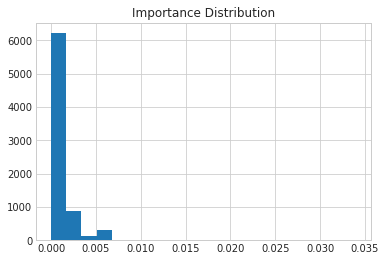

In [41]:
plt.hist(collide_importance_weight, bins=20)
plt.title("Importance Distribution")
plt.savefig(f'{export_stat_dir}/importance.png', dpi=300)
print(collide_importance_weight.max(), collide_importance_weight.min())

#### Export the checklist

In [42]:
# simple checklist
quick_check_list_path = f"{export_stat_dir}/quick_check_list.txt"
neg_caused_check_list_path = f"{export_stat_dir}/neg_caused_check_list.txt"
non_neg_check_list_path = f"{export_stat_dir}/non_neg_check_list.txt"

with open(quick_check_list_path, "w") as f:
    print(*set(quick_check_exp[("name", "first")].values), sep="\n", file=f)
with open(neg_caused_check_list_path, "w") as f:
    print(*set(neg_caused_collision["name"].values), sep="\n", file=f)
with open(non_neg_check_list_path, "w") as f:
    print(*set(no_neg_realated_collision["name"].values), sep="\n", file=f)

In [43]:
# ! pip install shapely

In [44]:
exp_stats_info

,name,end_time,crash_veh_1,crash_veh_2,importance,maneuver_challenge,neg_veh,neg_time_diff,neg_reason,neg_info,route_length,bv_22_route_length,lane_id,collision_type,location_type,relative_heading,distance
0,ITE_calibration_change_2roundabout_out_priorit...,1200.0,NaN,NaN,5.800881,1216,NaN,-1.0,NaN,NaN,70151.858813,6321.358391,NaN,NaN,NaN,None,-10.00
1,ITE_calibration_change_2roundabout_out_priorit...,1200.0,NaN,NaN,-0.093293,1140,NaN,-1.0,NaN,NaN,62875.229636,2615.580231,NaN,NaN,NaN,None,-10.00
2,ITE_calibration_change_2roundabout_out_priorit...,1200.0,NaN,NaN,-0.215063,1841,NaN,-1.0,NaN,NaN,68358.705988,1352.523919,NaN,NaN,NaN,None,-10.00
3,ITE_calibration_change_2roundabout_out_priorit...,1200.0,NaN,NaN,-0.139291,1079,NaN,-1.0,NaN,NaN,65264.695269,3166.389300,NaN,NaN,NaN,None,-10.00
4,ITE_calibration_change_2roundabout_out_priorit...,1200.0,NaN,NaN,-0.139080,935,NaN,-1.0,NaN,NaN,61733.181731,4165.565181,NaN,NaN,NaN,None,-10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91300,ITE_calibration_change_2roundabout_out_priorit...,905.5,BV_23.24,BV_23.26,3.291954,19,BV_23.26,2.9,Lead,roundabout_neglect_conflict_lead,947.146438,35.575744,:NODE_20_0_0,angle,roundabout,49.450261380621185,3.28
91301,ITE_calibration_change_2roundabout_out_priorit...,1200.0,NaN,NaN,3.190745,838,NaN,-1.0,NaN,NaN,57178.306721,3810.241528,NaN,NaN,NaN,None,-10.00
91302,ITE_calibration_change_2roundabout_out_priorit...,1200.0,NaN,NaN,-0.084236,1128,NaN,-1.0,NaN,NaN,58110.141120,1944.514409,NaN,NaN,NaN,None,-10.00
91303,ITE_calibration_change_2roundabout_out_priorit...,1200.0,NaN,NaN,-0.120390,948,NaN,-1.0,NaN,NaN,63941.508831,4307.876775,NaN,NaN,NaN,None,-10.00


### Generate videos in the check list

In [45]:
exp_stats_info["location"] = list(map(get_type_func, exp_stats_info["location_type"]))
exp_stats_info["collision"] = list(map(get_type_func, exp_stats_info["collision_type"]))

In [46]:
def get_location_collision_type(exp_id, exp_stats_info):
    mark = exp_stats_info["name"] == exp_id
    location_type = exp_stats_info[mark]["location"].values[0]
    collision_type = exp_stats_info[mark]["collision"].values[0]
    return location_type, collision_type

def export_videos(export_path, file_name, map_location="."):
    if not os.path.exists(export_path):
        os.system(f"mkdir -p {export_path}")
        os.system(f"chmod 755 {export_path}")
    with open(file_name) as f:
        for line in tqdm(f.readlines()): 
            exp_id = line.strip()
            path_name = os.path.join(experiment_record_repo, exp_id)
            if os.path.isdir(path_name):
                location_type, collision_type = get_location_collision_type(exp_id, exp_stats_info)
                if location_type == "None" or collision_type == "None":
                    visualizer(map_location, experiment_record_repo, exp_id, os.path.join(export_path, "None"))
                else:
                    visualizer(map_location, experiment_record_repo, exp_id, os.path.join(export_path, f"{location_type}/{collision_type}"))

In [47]:
# 生成三个文件夹: simple(typical) non-negligence-caused negligence-caused 
export_path = f"{exp_repo}/{mode}/{user}/videos"
file_name = f"{export_stat_dir}/check_list.txt"

# quick check
# export_videos(f"{export_path}/quick_check", "check.txt")

# export_videos(f"{export_path}/non_neg_check", non_neg_check_list_path)
# export_videos(f"{export_path}/neg_caused_check", neg_caused_check_list_path)

### See README-viz.md for visualization

In [48]:
exp_stats_info[(exp_stats_info["location"] == "roundabout") & (exp_stats_info["lane_id"] == ":NODE_21_0_0") & (exp_stats_info["neg_info"] == "roundabout_neglect_conflict_lead")]["name"].values

array([], dtype=object)

In [49]:
exp_stats_info[(exp_stats_info["location"] == "roundabout")]["lane_id"].unique()

array(['EG_34_1_24_1', ':nd_34_1_6_1_0', ':NODE_14_1_0', ':NODE_6_0_0',
       ':NODE_22_2_0', 'EG_34_1_16_0', ':nd_34_1_6_0_0', 'EG_34_1_3_0',
       'EG_34_1_3_1', ':NODE_5_1_1', ':NODE_22_1_0', 'EG_21_1_1_0',
       ':NODE_29_0_1', ':NODE_29_0_0', 'EG_10_1_1_0', 'EG_1_1_1_0',
       'EG_16_23_1_1', 'EG_9_1_1_0', 'EG_34_1_24_0', 'EG_16_23_1_0',
       'EG_19_1_1_0', ':NODE_5_1_0', ':NODE_21_0_0', 'EG_22_1_1_0',
       ':NODE_21_1_0', ':NODE_14_2_0', 'EG_20_1_1_0', 'EG_34_1_16_1',
       ':NODE_20_0_0', ':nd_34_1_6_1_1', ':NODE_31_1_0', ':NODE_16_1_0',
       ':NODE_13_1_0', ':nd_15_1_2_0_0', 'EG_23_2_1_0', ':NODE_13_0_0',
       ':NODE_22_3_0', ':NODE_19_2_0', 'EG_1_1_1_1', ':nd_34_1_6_0_1',
       ':NODE_6_2_0', ':NODE_7_0_1', 'EG_21_1_14_0', ':NODE_6_0_1',
       'EG_15_1_17_0', ':NODE_20_3_0', 'EG_34_1_6_0', 'EG_21_1_5_0',
       'EG_16_45_1_1', 'EG_20_1_11_0', 'EG_15_1_1_0'], dtype=object)